# Logistic Regression

## On 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
 loan = pd.read_csv("D:\Logistic Regression Dummy Data v3.csv")
loan.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [4]:
loan.shape

(1006, 14)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type of Account        1004 non-null   object 
 1   Account History        1004 non-null   object 
 2   Reason for the Loan    1003 non-null   object 
 3   Loan Amount            1003 non-null   float64
 4   Account Savings        1002 non-null   object 
 5   Employment History     1001 non-null   object 
 6   Individual Stauts      1001 non-null   object 
 7   Other Loans            1001 non-null   object 
 8   Security / Collateral  1001 non-null   object 
 9   Age                    1002 non-null   float64
 10  Residence Status       1002 non-null   object 
 11  Job                    1002 non-null   object 
 12  Completed Other loan?  1002 non-null   object 
 13  Good Loan              1001 non-null   object 
dtypes: float64(2), object(12)
memory usage: 110.2+ KB


Object Type: 

##### Handling Null Values

In [6]:
loan.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [7]:
loan['Type of Account'].dropna(inplace=True)
loan.dropna(subset=['Type of Account'], how='all',inplace =True)
#dropping rows which have null values in account type

In [8]:
loan.isnull().sum()

Type of Account          0
Account History          0
Reason for the Loan      1
Loan Amount              2
Account Savings          3
Employment History       3
Individual Stauts        3
Other Loans              3
Security / Collateral    3
Age                      3
Residence Status         3
Job                      3
Completed Other loan?    3
Good Loan                3
dtype: int64

In [9]:
loan.dropna(subset=['Loan Amount','Other Loans'], how='all',inplace =True)
#dropping rows which have null values in voth loan amount and other loans

In [10]:
loan.dropna(subset=['Good Loan'], how='all',inplace =True)
#dropping rows which have null values in good loan

In [11]:
loan['Good Loan'].value_counts()

No     536
Yes    465
Name: Good Loan, dtype: int64

In [12]:
loan.isnull().sum()

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [13]:
loan['Type of Account'].value_counts()

Type C     322
Type B     310
Type A     216
No Data    153
Name: Type of Account, dtype: int64

In [14]:
loan['Type of Account']=loan['Type of Account'].replace(['No Data'], 'Type D')

In [15]:
loan[loan['Age'] >100]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
679,Type C,Good,Home furniture,-548541254.0,No Data,Unemployed,Female_,No,Vehicle,327.0,House Owner,Skilled Labor,Yes,Yes


In [16]:
loan = loan[loan['Age'] <100]

In [17]:
loan.shape

(1000, 14)

In [18]:
#loan['Account Savings'].replace('<1',random.uniform(0.1,0.9))

In [19]:
display(loan['Reason for the Loan'].value_counts())
display(loan['Individual Stauts'].value_counts())
display(loan['Security / Collateral'].value_counts())
display(loan['Residence Status'].value_counts())
display(loan['Job'].value_counts())

TV                         280
Buying a New Car           234
Home furniture             181
Buying a Used Car          103
Support for Business        97
Learning / Edu purposes     50
Renovation                  22
Home Devices                12
All other                   12
Advance Edu/training         9
Name: Reason for the Loan, dtype: int64

Male        548
Female      310
Married      92
Divorced     50
Name: Individual Stauts, dtype: int64

Vehicle                   332
Property - Real Estate    282
Savings Account           232
No Security               154
Name: Security / Collateral, dtype: int64

House Owner    713
Renting        179
Free           108
Name: Residence Status, dtype: int64

Skilled Labor                630
Services                     200
Professional / Management    148
Not Employed                  22
Name: Job, dtype: int64

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1003
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type of Account        1000 non-null   object 
 1   Account History        1000 non-null   object 
 2   Reason for the Loan    1000 non-null   object 
 3   Loan Amount            1000 non-null   float64
 4   Account Savings        1000 non-null   object 
 5   Employment History     1000 non-null   object 
 6   Individual Stauts      1000 non-null   object 
 7   Other Loans            1000 non-null   object 
 8   Security / Collateral  1000 non-null   object 
 9   Age                    1000 non-null   float64
 10  Residence Status       1000 non-null   object 
 11  Job                    1000 non-null   object 
 12  Completed Other loan?  1000 non-null   object 
 13  Good Loan              1000 non-null   object 
dtypes: float64(2), object(12)
memory usage: 117.2+ KB


In [21]:
loan['Individual Stauts'] = loan['Individual Stauts'].replace(['Female_'],'Female')
#replacing value'female_' with female

In [22]:
display(loan['Individual Stauts'].value_counts())

Male        548
Female      310
Married      92
Divorced     50
Name: Individual Stauts, dtype: int64

In [23]:
lst =  ['Other Loans','Completed Other loan?','Good Loan']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
loan[lst] = loan[lst].apply(binary_map)

In [24]:
loan['Other Loans'] = pd.to_numeric(loan['Other Loans'])
loan['Completed Other loan?'] = pd.to_numeric(loan['Completed Other loan?'])
loan['Good Loan'] = pd.to_numeric(loan['Good Loan'])
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1003
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type of Account        1000 non-null   object 
 1   Account History        1000 non-null   object 
 2   Reason for the Loan    1000 non-null   object 
 3   Loan Amount            1000 non-null   float64
 4   Account Savings        1000 non-null   object 
 5   Employment History     1000 non-null   object 
 6   Individual Stauts      1000 non-null   object 
 7   Other Loans            1000 non-null   int64  
 8   Security / Collateral  1000 non-null   object 
 9   Age                    1000 non-null   float64
 10  Residence Status       1000 non-null   object 
 11  Job                    1000 non-null   object 
 12  Completed Other loan?  1000 non-null   int64  
 13  Good Loan              1000 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 117.2+ 

In [25]:
loan.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,Type D,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,0,Property - Real Estate,47.0,House Owner,Services,0,0
1,Type D,critical,TV,2438.0,No Data,7+ Years,Male,0,Savings Account,52.0,House Owner,Skilled Labor,0,0
2,Type D,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,0,Vehicle,48.0,House Owner,Skilled Labor,0,0
3,Type D,critical,Home furniture,2073.0,No Data,2-5 Years,Married,0,Vehicle,25.0,House Owner,Skilled Labor,1,0
4,Type D,critical,Support for Business,1276.0,No Data,7+ Years,Male,0,No Security,59.0,Renting,Services,0,0


In [26]:
display(loan['Employment History'].value_counts())

2-5 Years     339
7+ Years      253
5-7 Years     174
0-2 Years     172
Unemployed     62
Name: Employment History, dtype: int64

In [27]:
loan['Employment History']= loan['Employment History'].replace({"Unemployed": 0, "0-2 Years": 2,
                                                                "2-5 Years": 4,"5-7 Years": 6,
                                                                "7+ Years":8})

In [28]:
display(loan['Employment History'].value_counts())

4    339
8    253
6    174
2    172
0     62
Name: Employment History, dtype: int64

### Statistics and Visualisation:

In [29]:
loan.describe()

,Loan Amount,Employment History,Other Loans,Age,Completed Other loan?,Good Loan
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3281.740000,4.768000,0.093000,35.543000,0.038000,0.464000
std,2822.986025,2.416613,0.290578,11.413344,0.191292,0.498952
min,254.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,1374.750000,4.000000,0.000000,27.000000,0.000000,0.000000
50%,2326.500000,4.000000,0.000000,33.000000,0.000000,0.000000
75%,3980.750000,8.000000,0.000000,42.000000,0.000000,1.000000
max,18427.000000,8.000000,1.000000,75.000000,1.000000,1.000000


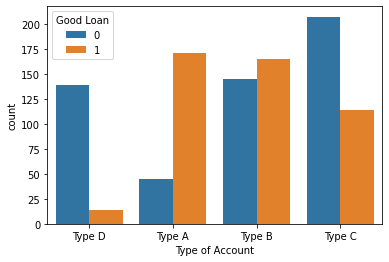

In [30]:
sns.countplot(x = 'Type of Account', data = loan, hue = 'Good Loan')
plt.show()

Creating Dummy Variables for categorical data types:

In [31]:

act= pd.get_dummies(loan['Type of Account'], prefix= 'Acc')
loan = pd.concat([loan,act], axis=1)

ach= pd.get_dummies(loan['Account History'], prefix= 'Acc_Hist')
loan = pd.concat([loan,ach], axis=1)

res = pd.get_dummies(loan['Reason for the Loan'], prefix='Reason')
loan = pd.concat([loan,res], axis=1)


acs= pd.get_dummies(loan['Account Savings'], prefix= 'Acc_Savings')
loan = pd.concat([loan,acs], axis=1)


indst = pd.get_dummies(loan['Individual Stauts'], prefix='Individual Status')
loan = pd.concat([loan,indst], axis=1)


sc = pd.get_dummies(loan['Security / Collateral'], prefix='Collateral')
loan = pd.concat([loan,sc], axis=1)

rs = pd.get_dummies(loan['Residence Status'], prefix='Residence')
loan = pd.concat([loan,rs], axis=1)

jb = pd.get_dummies(loan['Job'], prefix='Job')
loan = pd.concat([loan,jb], axis=1)

In [32]:
#pd.set_option("display.max_columns", None)
loan.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,...,Collateral_Property - Real Estate,Collateral_Savings Account,Collateral_Vehicle,Residence_Free,Residence_House Owner,Residence_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor
0,Type D,critical,Learning / Edu purposes,2116.0,0-200,6,Male,0,Property - Real Estate,47.0,...,1,0,0,0,1,0,0,0,1,0
1,Type D,critical,TV,2438.0,No Data,8,Male,0,Savings Account,52.0,...,0,1,0,0,1,0,0,0,0,1
2,Type D,critical,Buying a New Car,2144.0,0-200,4,Male,0,Vehicle,48.0,...,0,0,1,0,1,0,0,0,0,1
3,Type D,critical,Home furniture,2073.0,No Data,4,Married,0,Vehicle,25.0,...,0,0,1,0,1,0,0,0,0,1
4,Type D,critical,Support for Business,1276.0,No Data,8,Male,0,No Security,59.0,...,0,0,0,0,0,1,0,0,1,0


In [33]:
ln= loan.drop(['Type of Account','Account History','Reason for the Loan','Account Savings',
               'Individual Stauts','Security / Collateral','Residence Status','Job'],1)


In [34]:
ln.head()

,Loan Amount,Employment History,Other Loans,Age,Completed Other loan?,Good Loan,Acc_Type A,Acc_Type B,Acc_Type C,Acc_Type D,...,Collateral_Property - Real Estate,Collateral_Savings Account,Collateral_Vehicle,Residence_Free,Residence_House Owner,Residence_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor
0,2116.0,6,0,47.0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,2438.0,8,0,52.0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,2144.0,4,0,48.0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
3,2073.0,4,0,25.0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
4,1276.0,8,0,59.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [35]:
ln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1003
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Loan Amount                        1000 non-null   float64
 1   Employment History                 1000 non-null   int64  
 2   Other Loans                        1000 non-null   int64  
 3   Age                                1000 non-null   float64
 4   Completed Other loan?              1000 non-null   int64  
 5   Good Loan                          1000 non-null   int64  
 6   Acc_Type A                         1000 non-null   uint8  
 7   Acc_Type B                         1000 non-null   uint8  
 8   Acc_Type C                         1000 non-null   uint8  
 9   Acc_Type D                         1000 non-null   uint8  
 10  Acc_Hist_Average (known delays)    1000 non-null   uint8  
 11  Acc_Hist_Good                      1000 non-null   uint8

In [36]:
cor= ln.corr()
#cor

In [ ]:

plt.figure(figsize = (30,15))       
sns.heatmap(cor,annot = True)
plt.tight_layout()

#### Model Buliding:

In [ ]:
##
x= ln.drop(['Good Loan'], axis=1)
x.head()

In [ ]:
y = loan['Good Loan']
y.head()

In [ ]:
#train -test split:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
"""
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
"""


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

In [ ]:
print(log_reg.coef_)
print(log_reg.intercept_)

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
prob = log_reg.predict_proba(x_test)
prob = prob.reshape(-1,1)

In [ ]:
conf=confusion_matrix(y_test, y_pred)
conf

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
TP = conf[1,1] # true positive 
TN = conf[0,0] # true negatives
FP = conf[0,1] # false positives
FN = conf[1,0] # false negatives

In [ ]:
#Precision:
Precision=TP/(TP+FP)
Precision

In [ ]:
#Recall:
Recall = TP/(TP+FN)
Recall

In [ ]:
#fpr, tpr, thresholds = metrics.roc_curve( y_pred, prob, drop_intermediate = False )

In [ ]:

roc 